This notebook purpose is to generate our violin plots and to calculate the FP and RP metrics

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
data_java = pd.read_csv('.\Data\projects_java.csv')
data_android = pd.read_csv('.\Data\projects_android.csv')

In [10]:
data_all = data_java.append(data_android)

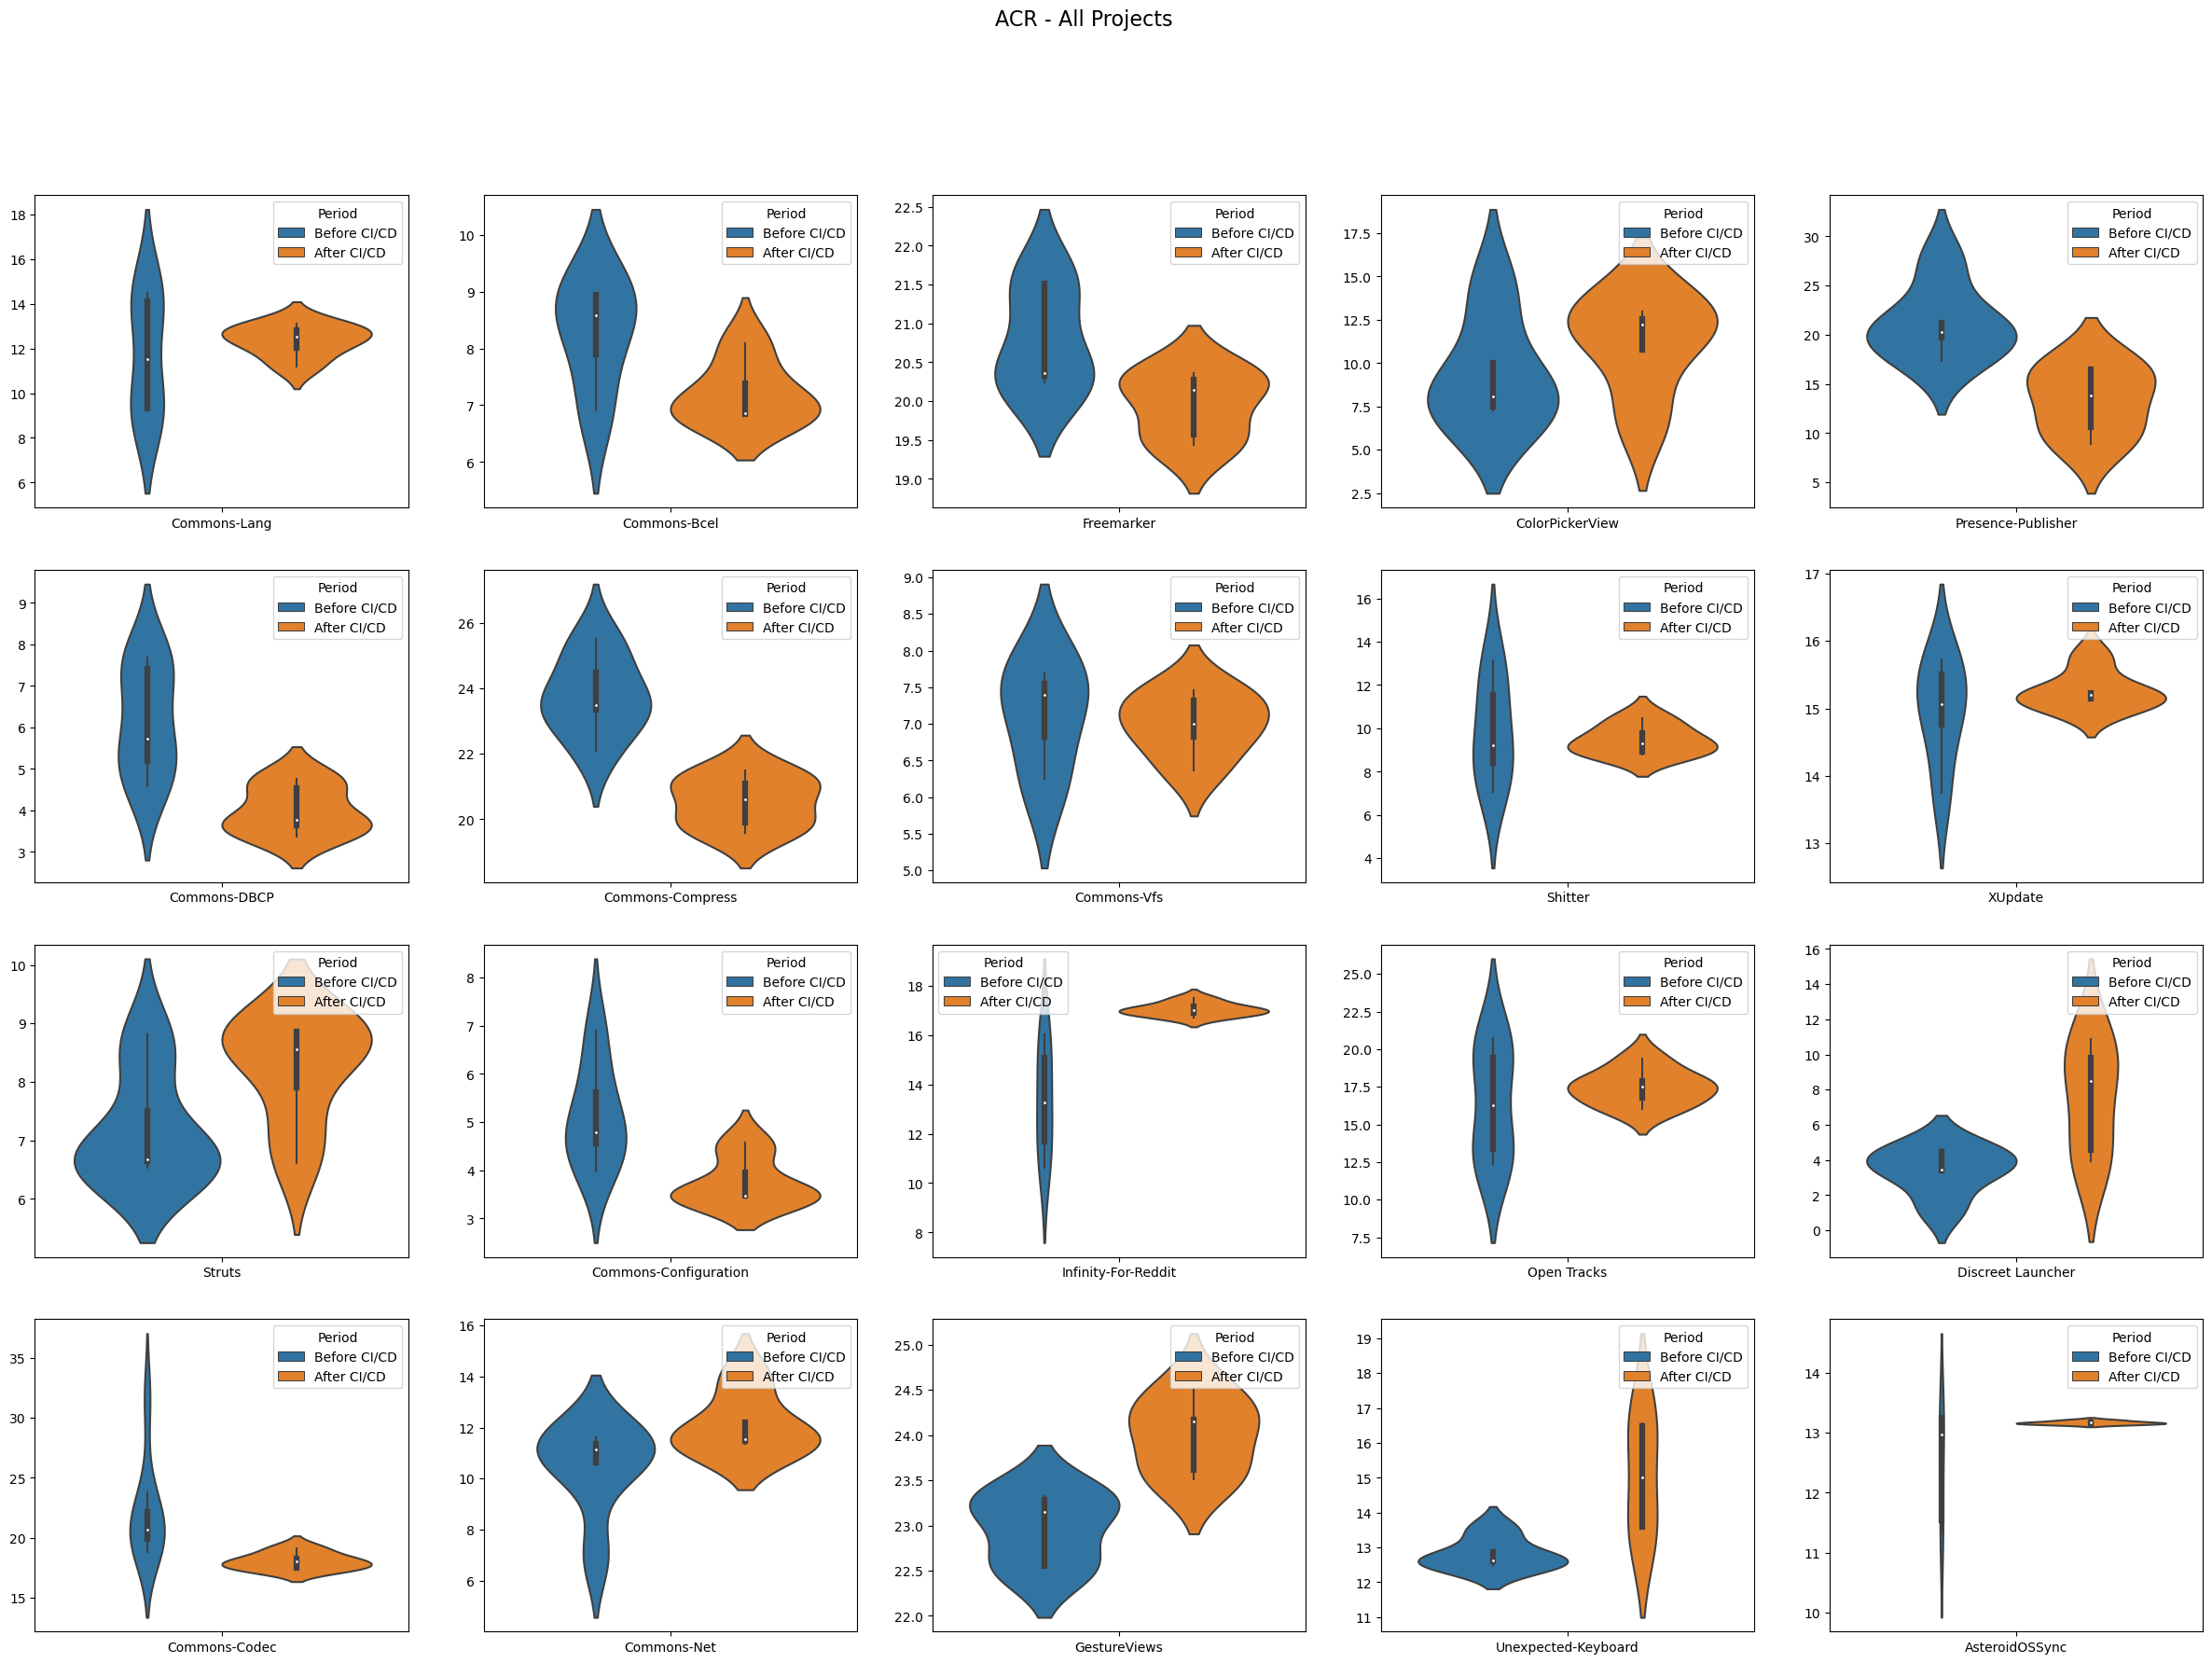

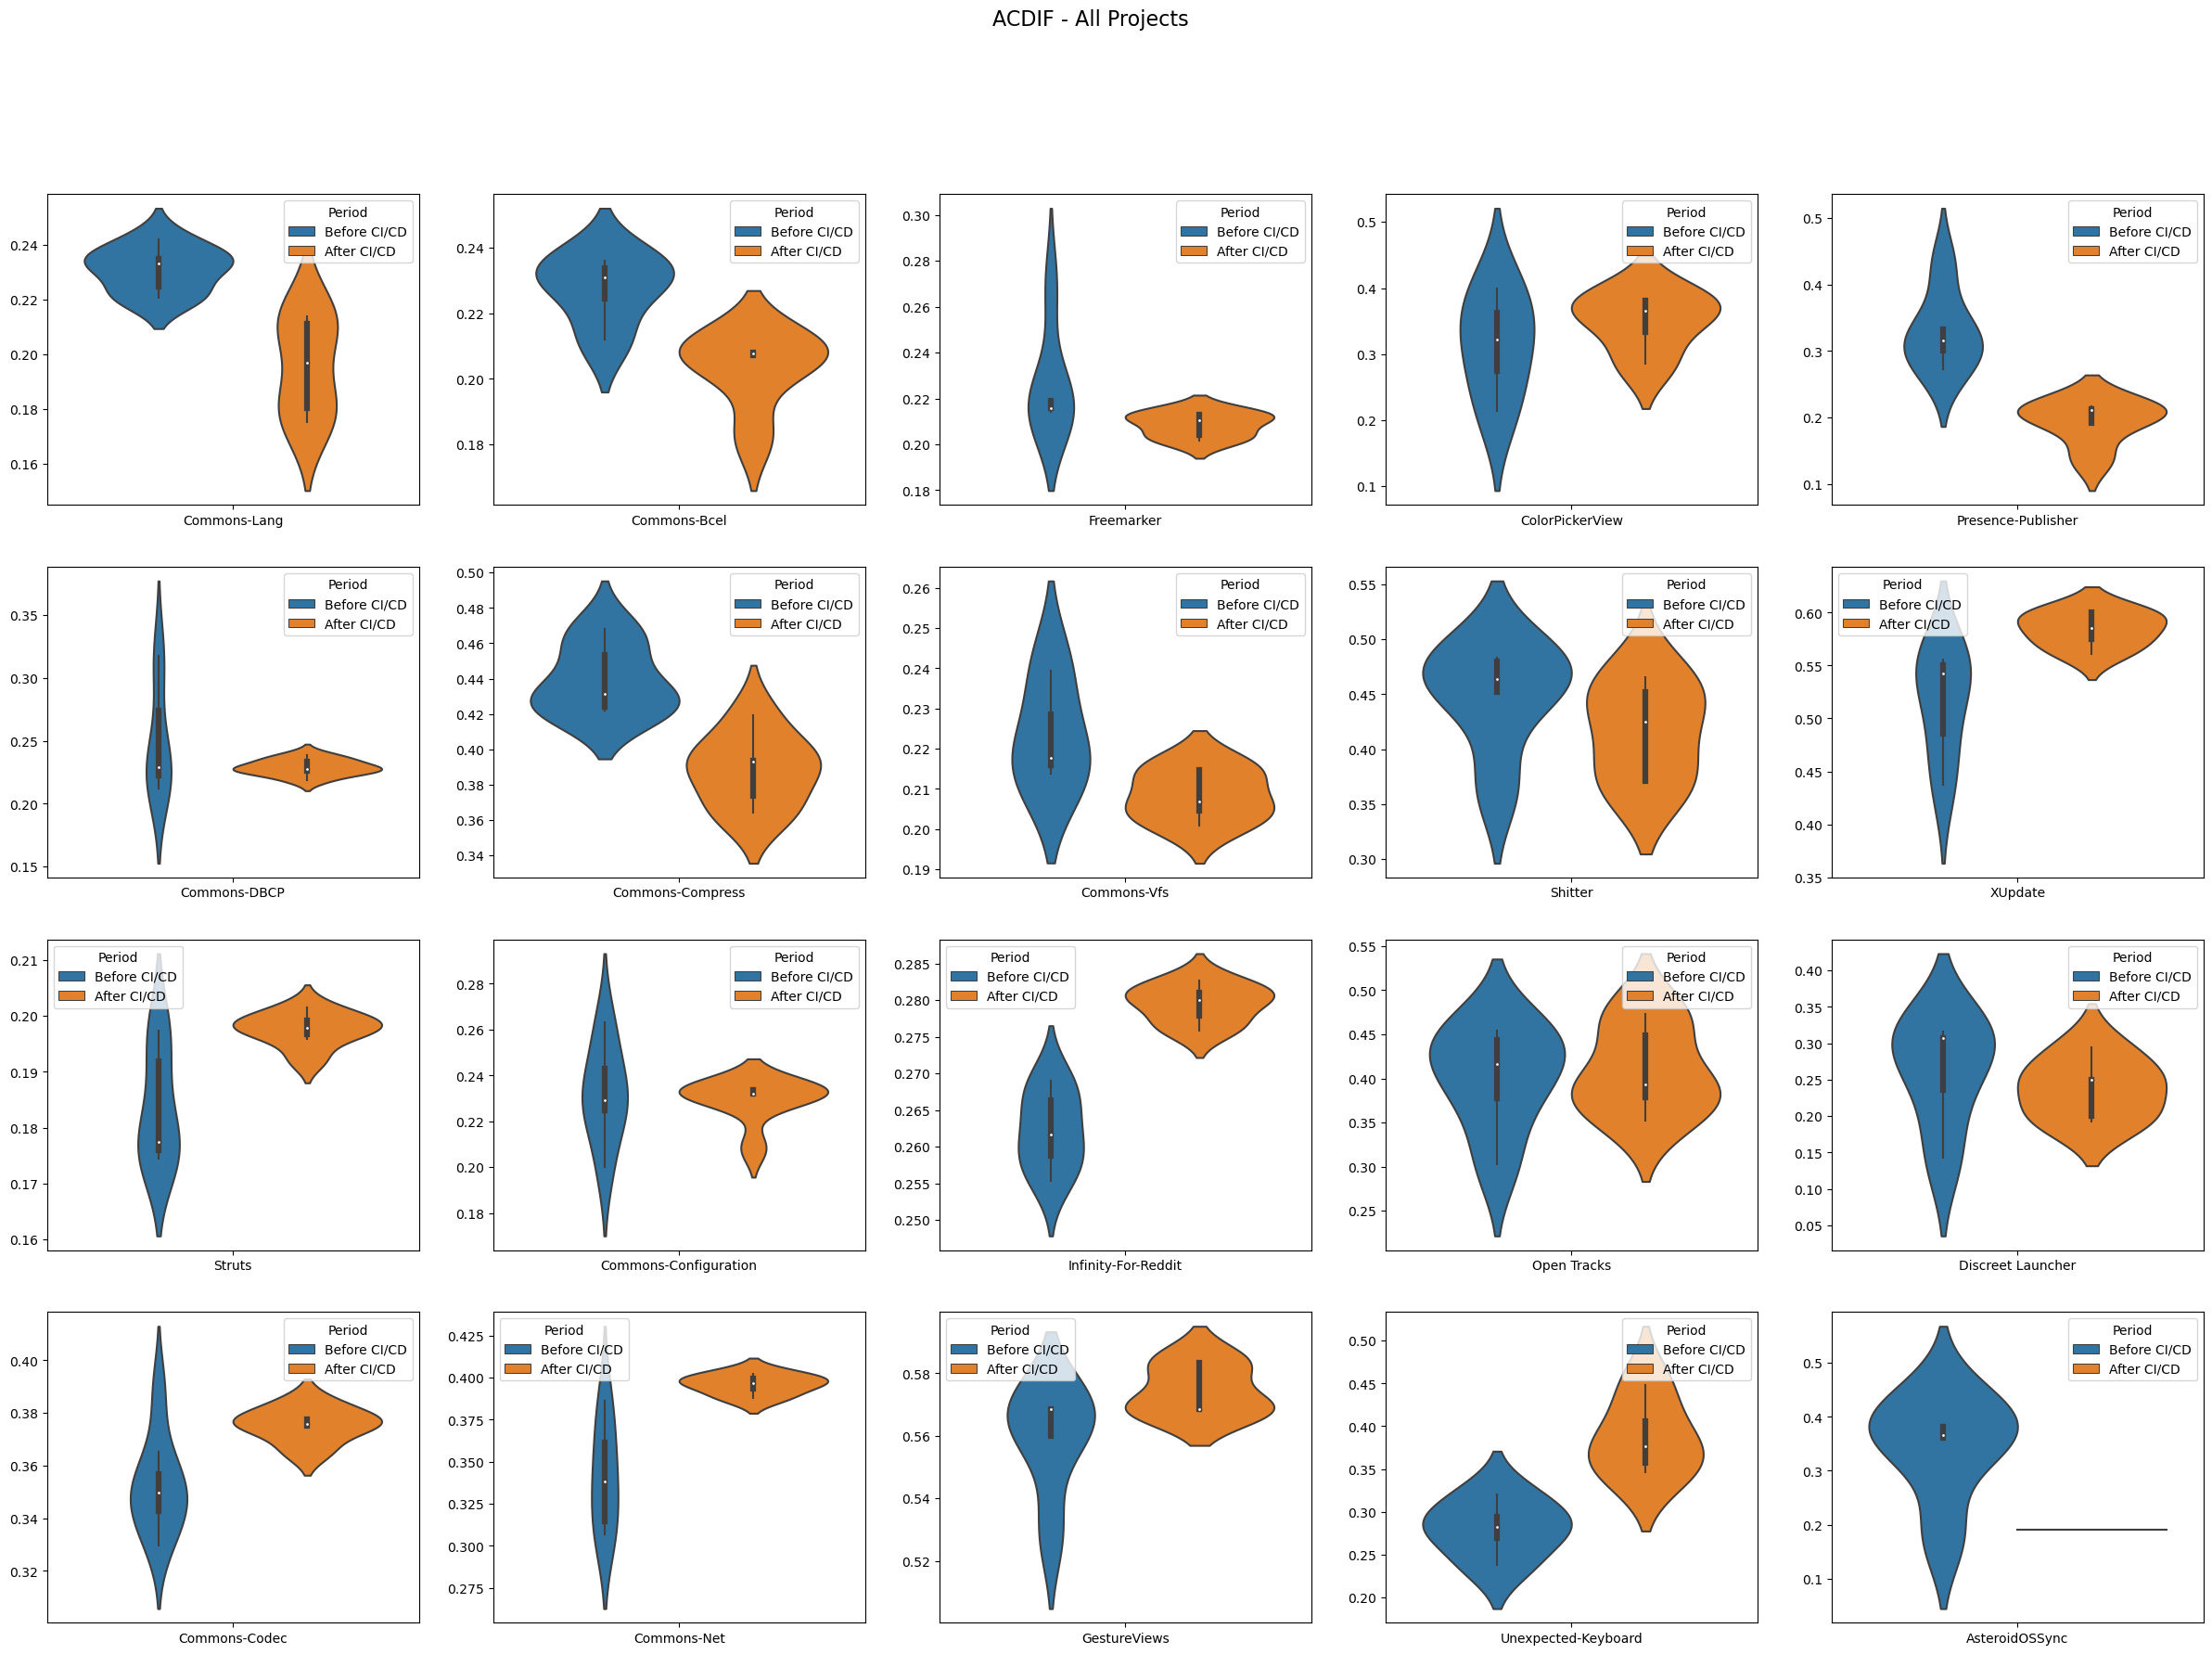

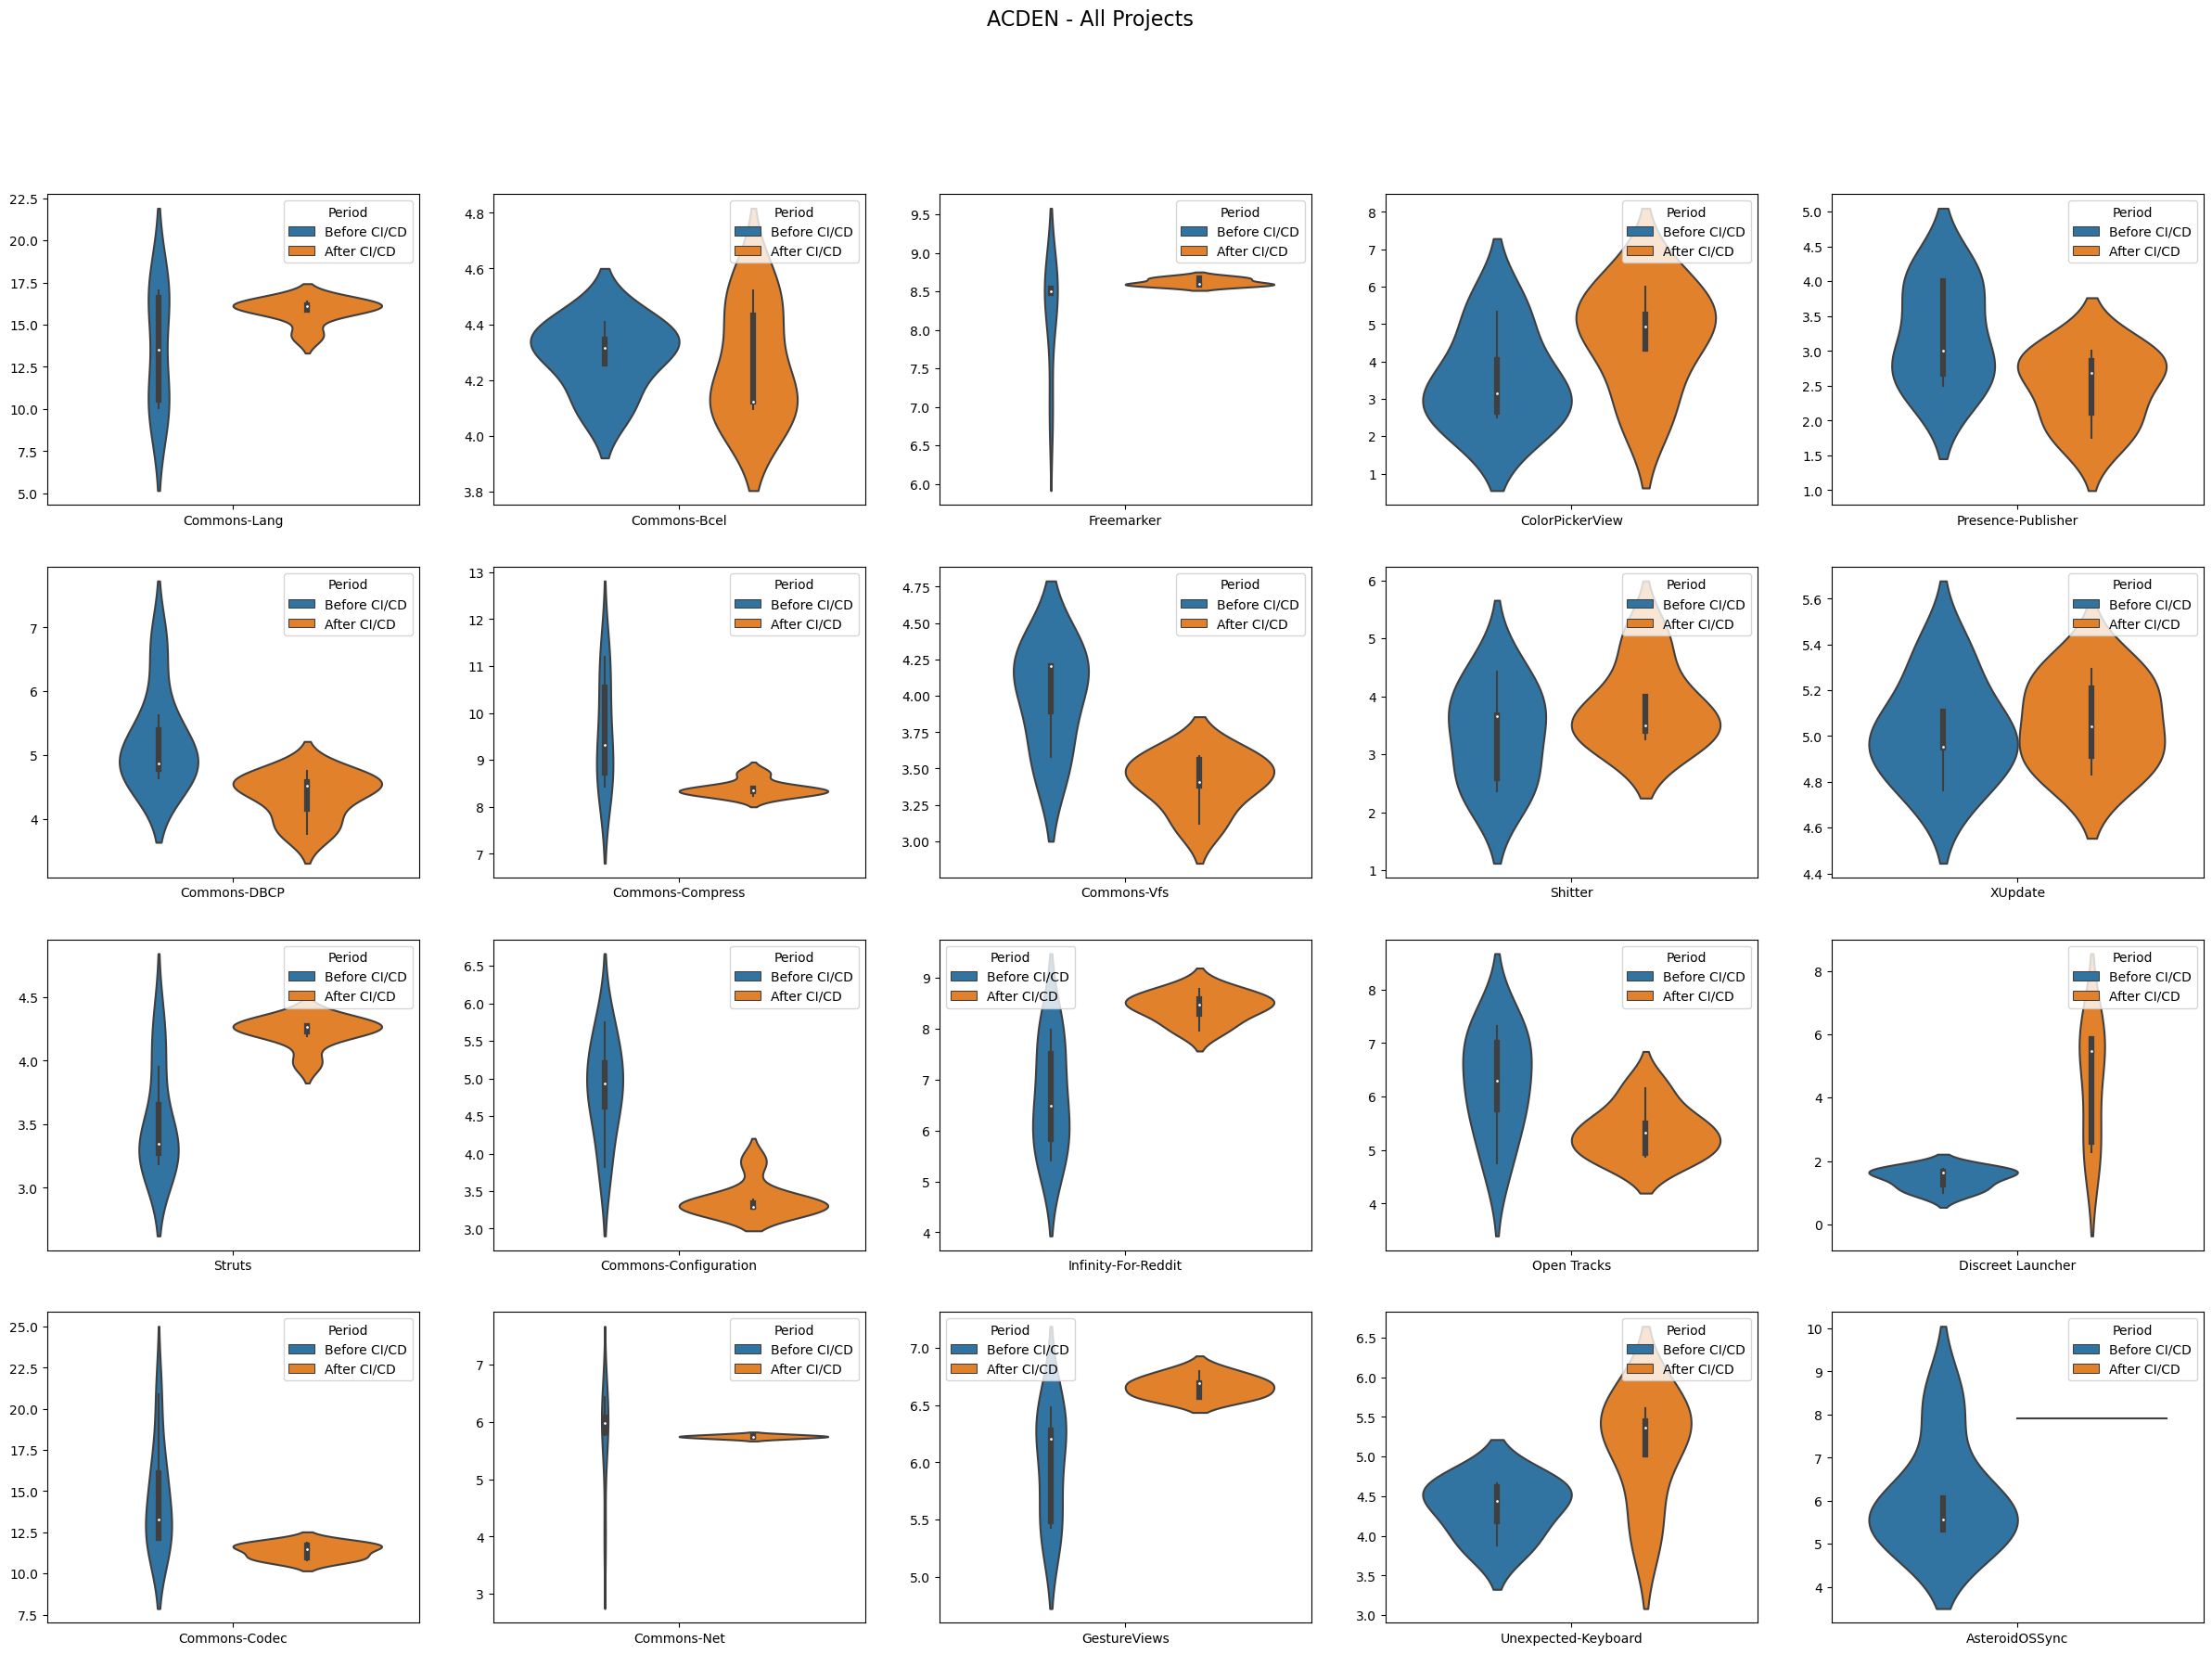

In [11]:
metrics = ['Rate', 'Diffusion', 'Density']
project_list = data_all['Project'].unique()

for j in metrics:
    fig, axs = plt.subplots(4, 5, figsize=(30,20))
    #fig.tight_layout()
    for i in range(len(project_list)):
        data_project = data_all[data_all['Project'] == project_list[i]]
        a = int(i/4)
        b = i%4
        if j == 'Rate':
            sns.violinplot(ax = axs[b,a], data=data_project, x='Project', hue="Period", y = 'Number of Atoms per LoC (10^-3)').set(xlabel='', ylabel='')
        elif j == 'Diffusion':
            sns.violinplot(ax = axs[b,a], data=data_project, x='Project', hue="Period", y = 'Atom Diffusion').set(xlabel='', ylabel='')
        elif j == 'Density':
            sns.violinplot(ax = axs[b,a], data=data_project, x='Project', hue="Period", y = 'Atom Density').set(xlabel='', ylabel='')
    
    if(j == 'Rate'):
        fig.suptitle('ACR - All Projects', fontsize=16)
    elif(j == 'Diffusion'):
        fig.suptitle('ACDIF - All Projects', fontsize=16)
    elif(j == 'Density'):
        fig.suptitle('ACDEN - All Projects', fontsize=16)
    plt.savefig(fname=r'.\Output\violin_' + j + '.png', dpi=100)        
    plt.show()

In [12]:
atom_types = ['PostIncDec', 'PreIncDec', 'IOP', 'CO', 'AaL', 'LaCF', 'RV', 'CoLE', 'OCB', 'TC']

Popularidade de Frequência - Todas as Versões

Essa análise checa a frequência que um átomo apareceu, considerando todas as versões.
Ex: Se no Projeto A, versão 1, o atómo AaL apareceu, e na versão 2 do mesmo projetos, ele também apareceu, então o átomo apareceu duas vezes.
Essa análise não se importa com a quantidade de átomos, nem se um átomo some ou aparece ao longo do histórico.

In [13]:
#Por presença em todos os projetos
df = pd.DataFrame()
for i in atom_types:
    freq_atom = data_all[data_all[i] != 0].shape[0]
    df[i] = [freq_atom]
print(df)

   PostIncDec  PreIncDec  IOP   CO  AaL  LaCF  RV  CoLE  OCB   TC
0         165        128  200  204   10   211  31    68    0  202


In [14]:
df.max(axis=1)

0    211
dtype: int64

In [15]:
df.drop('OCB', axis=1).min(axis=1)

0    10
dtype: int64

In [16]:
##Por presença em todos os projetos - Separado Before/After
#AVISO: Número de versões before e after NÃO são iguais pra todo projeto
df = pd.DataFrame()
for i in atom_types:
    data_before = data_all[data_all['Period'] == 'Before CI/CD']
    data_after = data_all[data_all['Period'] == 'After CI/CD']
    freq_before = data_before[data_before[i] != 0].shape[0]
    freq_after = data_after[data_after[i] != 0].shape[0]
    df['Period'] = ['Before', 'After']
    df[i] = [freq_before, freq_after]
print(df)

   Period  PostIncDec  PreIncDec  IOP   CO  AaL  LaCF  RV  CoLE  OCB   TC
0  Before          82         64   93   98    2   104  14    29    0   97
1   After          83         64  107  106    8   107  17    39    0  105


In [17]:
#Por presença nos projetos Android e Bibliotecas Java separadamente
df = pd.DataFrame()
for i in atom_types:
    freq_java = data_java[data_java[i] != 0].shape[0]
    freq_android = data_android[data_android[i] != 0].shape[0]
    df['Type'] = ['Java', 'Android']
    df[i] = [freq_java, freq_android]
print(df)

      Type  PostIncDec  PreIncDec  IOP   CO  AaL  LaCF  RV  CoLE  OCB   TC
0     Java         116        113  110  116   10   116  31    65    0  116
1  Android          49         15   90   88    0    95   0     3    0   86


In [18]:
df.max(axis=1)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_17736\1471452883.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max(axis=1)


0    116
1     95
dtype: int64

In [19]:
#Por presença em cada projeto separadamente
projects_java = data_java['Project'].unique()
projects_android = data_android['Project'].unique()
all_projects = np.concatenate((projects_java, projects_android))

df = pd.DataFrame()

for i in atom_types:
    atoms = []
    for j in all_projects:
        data_project_java = data_java[data_java['Project'] == j]
        data_project_android = data_android[data_android['Project'] == j]
        freq_java = data_project_java[data_project_java[i] != 0].shape[0]
        freq_android = data_project_android[data_project_android[i] != 0].shape[0]
        atoms.append(freq_java + freq_android)
    df['Project'] = all_projects
    df[i] = atoms
print(df)

                  Project  PostIncDec  PreIncDec  IOP  CO  AaL  LaCF  RV  \
0            Commons-Lang          12         12   12  12    0    12   6   
1            Commons-DBCP          15         15   13  15    0    15   0   
2                  Struts          14         14   12  14    8    14   0   
3           Commons-Codec          13         13   13  13    0    13   0   
4            Commons-Bcel           9          9    9   9    0     9   9   
5        Commons-Compress          12         12   12  12    2    12  12   
6   Commons-Configuration          13         12   12  13    0    13   1   
7             Commons-Net          10         10    9  10    0    10   1   
8              Freemarker          10         10   10  10    0    10   0   
9             Commons-Vfs           8          6    8   8    0     8   2   
10    Infinity-For-Reddit           3          0   12  12    0    12   0   
11           GestureViews           0          0   10  10    0    10   0   
12        Co

Popularidade de Frequência - Média

Essa análise checa a frequência percentual que um átomo apareceu. Essa é a métrica que chamamos de FP em si, quando separada entre antes e depois de CI/CD

In [20]:
#Por presença em todos os projetos
df = pd.DataFrame()
for i in atom_types:
    freq_atom = data_java[data_java[i] != 0].shape[0] + data_android[data_android[i] != 0].shape[0]
    total = data_java.shape[0] + data_android.shape[0]
    freq_mean = freq_atom/total
    df[i] = [freq_mean]
print(df)

   PostIncDec  PreIncDec       IOP        CO       AaL      LaCF        RV  \
0    0.763889   0.592593  0.925926  0.944444  0.046296  0.976852  0.143519   

       CoLE  OCB        TC  
0  0.314815  0.0  0.935185  


In [21]:
#FP
##Por presença em todos os projetos - Separado Before/After
df = pd.DataFrame()
for i in atom_types:
    data_before = data_all[data_all['Period'] == 'Before CI/CD']
    data_after = data_all[data_all['Period'] == 'After CI/CD']
    freq_before = data_before[data_before[i] != 0].shape[0]
    freq_after = data_after[data_after[i] != 0].shape[0]
    total_before = data_before.shape[0]
    total_after = data_after.shape[0]
    mean_before = freq_before/total_before
    mean_after = freq_after/total_after
    df['Period'] = ['Before', 'After']
    df[i] = [mean_before, mean_after]
print(df)

   Period  PostIncDec  PreIncDec       IOP        CO       AaL      LaCF  \
0  Before    0.759259   0.592593  0.861111  0.907407  0.018519  0.962963   
1   After    0.768519   0.592593  0.990741  0.981481  0.074074  0.990741   

         RV      CoLE  OCB        TC  
0  0.129630  0.268519  0.0  0.898148  
1  0.157407  0.361111  0.0  0.972222  


In [22]:
#Por presença nos projetos Android e Bibliotecas Java separadamente
df = pd.DataFrame()
for i in atom_types:
    freq_java = data_java[data_java[i] != 0].shape[0]
    total_java = data_java.shape[0]
    freq_mean_java = freq_java/total_java
    freq_android = data_android[data_android[i] != 0].shape[0]
    total_android = data_android.shape[0]
    freq_mean_android = freq_android/total_android
    df['Type'] = ['Java', 'Android']
    df[i] = [freq_mean_java, freq_mean_android]
print(df)

      Type  PostIncDec  PreIncDec       IOP    CO       AaL  LaCF        RV  \
0     Java        1.00   0.974138  0.948276  1.00  0.086207  1.00  0.267241   
1  Android        0.49   0.150000  0.900000  0.88  0.000000  0.95  0.000000   

       CoLE  OCB    TC  
0  0.560345  0.0  1.00  
1  0.030000  0.0  0.86  


In [23]:
#Por presença em cada projeto separadamente
projects_java = data_java['Project'].unique()
projects_android = data_android['Project'].unique()
all_projects = np.concatenate((projects_java, projects_android))

df = pd.DataFrame()

for i in atom_types:
    atoms = []
    for j in all_projects:
        data_project_java = data_java[data_java['Project'] == j]
        data_project_android = data_android[data_android['Project'] == j]
        freq_java = data_project_java[data_project_java[i] != 0].shape[0]
        total_java = data_project_java.shape[0]
        freq_android = data_project_android[data_project_android[i] != 0].shape[0]
        total_android = data_project_android.shape[0]
        if total_java != 0:
            freq_mean = freq_java/total_java
        elif total_android != 0:
            freq_mean = freq_android/total_android
        atoms.append(freq_mean)
    df['Project'] = all_projects
    df[i] = atoms
print(df)

                  Project  PostIncDec  PreIncDec       IOP    CO       AaL  \
0            Commons-Lang    1.000000   1.000000  1.000000  1.00  0.000000   
1            Commons-DBCP    1.000000   1.000000  0.866667  1.00  0.000000   
2                  Struts    1.000000   1.000000  0.857143  1.00  0.571429   
3           Commons-Codec    1.000000   1.000000  1.000000  1.00  0.000000   
4            Commons-Bcel    1.000000   1.000000  1.000000  1.00  0.000000   
5        Commons-Compress    1.000000   1.000000  1.000000  1.00  0.166667   
6   Commons-Configuration    1.000000   0.923077  0.923077  1.00  0.000000   
7             Commons-Net    1.000000   1.000000  0.900000  1.00  0.000000   
8              Freemarker    1.000000   1.000000  1.000000  1.00  0.000000   
9             Commons-Vfs    1.000000   0.750000  1.000000  1.00  0.000000   
10    Infinity-For-Reddit    0.250000   0.000000  1.000000  1.00  0.000000   
11           GestureViews    0.000000   0.000000  1.000000  1.00

Popularidade de Frequência - Numérica

Essa análise checa a frequência numérica dos átomos. Isso é, não apenas se ele apareceu ou não, mas quantas instâncias do átomo apareceram. Isso leva em conta o total, tomando todas as versões em consideração

In [24]:
#Por presença em todos os projetos
df = pd.DataFrame()
for i in atom_types:
    freq_atom = data_java[i].sum() + data_android[i].sum()
    df[i] = [freq_atom]
print(df)

   PostIncDec  PreIncDec    IOP     CO  AaL   LaCF   RV  CoLE  OCB     TC
0        5361       1493  12417  30285   66  43932  149   511    0  21925


In [25]:
#Por presença nos projetos Android e Bibliotecas Java separadamente
df = pd.DataFrame()
for i in atom_types:
    freq_java = data_java[i].sum()
    freq_android = data_android[i].sum()
    df['Type'] = ['Java', 'Android']
    df[i] = [freq_java, freq_android]
print(df)

      Type  PostIncDec  PreIncDec    IOP     CO  AaL   LaCF   RV  CoLE  OCB  \
0     Java        5026       1471  10665  21377   66  28234  149   507    0   
1  Android         335         22   1752   8908    0  15698    0     4    0   

      TC  
0  19696  
1   2229  


In [26]:
#Por presença em cada projeto separadamente
projects_java = data_java['Project'].unique()
projects_android = data_android['Project'].unique()
all_projects = np.concatenate((projects_java, projects_android))

df = pd.DataFrame()

for i in atom_types:
    atoms = []
    for j in all_projects:
        data_project_java = data_java[data_java['Project'] == j]
        data_project_android = data_android[data_android['Project'] == j]
        freq_java = data_project_java[i].sum()
        freq_android = data_project_android[i].sum()
        atoms.append(freq_java + freq_android)
    df['Project'] = all_projects
    df[i] = atoms
print(df)

                  Project  PostIncDec  PreIncDec   IOP    CO  AaL  LaCF  RV  \
0            Commons-Lang         652        204  3007  2800    0  4013  38   
1            Commons-DBCP          20         15   114   486    0  1245   0   
2                  Struts         557        103   394  3325   64  5363   0   
3           Commons-Codec        1213         69   102   578    0  1844   0   
4            Commons-Bcel         368        157   135  1171    0  1538  18   
5        Commons-Compress         892        582   753  2181    2  2500  76   
6   Commons-Configuration         122         46    28  1637    0  2266   2   
7             Commons-Net         568        225    48   505    0  1427   1   
8              Freemarker         603         64  5988  8176    0  6516   0   
9             Commons-Vfs          31          6    96   518    0  1522  14   
10    Infinity-For-Reddit           3          0   303  4187    0  8898   0   
11           GestureViews           0          0   2

Popularidade de Frequência - Numérica Média

Essa análise checa a frequência numérica dos átomos em média. O mesmo que o anterior, só ao invés de contar todas as versões ao mesmo tempo, é achado um valor médio ao somar o valor de todas as médias. 

In [27]:
#Por presença em todos os projetos
df = pd.DataFrame()
for i in atom_types:
    freq_atom = data_java[i].sum() + data_android[i].sum()
    total = data_java.shape[0] + data_android.shape[0]
    freq_mean = freq_atom/total
    df[i] = [freq_mean]
df

,PostIncDec,PreIncDec,IOP,CO,AaL,LaCF,RV,CoLE,OCB,TC
0,24.819444,6.912037,57.486111,140.208333,0.305556,203.388889,0.689815,2.365741,0.0,101.50463


In [28]:
##Por presença em todos os projetos - Separado Before/After
df = pd.DataFrame()
for i in atom_types:
    data_before = data_all[data_all['Period'] == 'Before CI/CD']
    data_after = data_all[data_all['Period'] == 'After CI/CD']
    freq_before = data_before[i].sum()
    freq_after = data_after[i].sum()
    total_before = data_before.shape[0]
    total_after = data_after.shape[0]
    mean_before = freq_before/total_before
    mean_after = freq_after/total_after
    df['Period'] = ['Before', 'After']
    df[i] = [mean_before, mean_after]
print(df)

   Period  PostIncDec  PreIncDec        IOP          CO       AaL        LaCF  \
0  Before   21.212963   6.379630  49.305556  114.370370  0.148148  168.537037   
1   After   28.425926   7.444444  65.666667  166.046296  0.462963  238.240741   

         RV      CoLE  OCB          TC  
0  0.472222  1.953704  0.0   85.546296  
1  0.907407  2.777778  0.0  117.462963  


In [29]:
#Por presença nos projetos Android e Bibliotecas Java separadamente
df = pd.DataFrame()
for i in atom_types:
    freq_java = data_java[i].sum()
    total_java = data_java.shape[0]
    freq_mean_java = freq_java/total_java
    freq_android = data_android[i].sum()
    total_android = data_android.shape[0]
    freq_mean_android = freq_android/total_android
    df['Type'] = ['Java', 'Android']
    df[i] = [freq_mean_java, freq_mean_android]
df

,Type,PostIncDec,PreIncDec,IOP,CO,AaL,LaCF,RV,CoLE,OCB,TC
0,Java,43.327586,12.681034,91.939655,184.284483,0.568966,243.396552,1.284483,4.37069,0.0,169.793103
1,Android,3.350000,0.220000,17.520000,89.080000,0.000000,156.980000,0.000000,0.04000,0.0,22.290000


In [30]:
#Por presença em cada projeto separadamente
projects_java = data_java['Project'].unique()
projects_android = data_android['Project'].unique()
all_projects = np.concatenate((projects_java, projects_android))

df = pd.DataFrame()

for i in atom_types:
    atoms = []
    for j in all_projects:
        data_project_java = data_java[data_java['Project'] == j]
        data_project_android = data_android[data_android['Project'] == j]
        freq_java = data_project_java[i].sum()
        total_java = data_project_java.shape[0]
        freq_android = data_project_android[i].sum()
        total_android = data_project_android.shape[0]
        if total_java != 0:
            freq_mean = freq_java/total_java
        elif total_android != 0:
            freq_mean = freq_android/total_android
        atoms.append(freq_mean)
    df['Project'] = all_projects
    df[i] = atoms
df

,Project,PostIncDec,PreIncDec,IOP,CO,AaL,LaCF,RV,CoLE,OCB,TC
0,Commons-Lang,54.333333,17.000000,250.583333,233.333333,0.000000,334.416667,3.166667,15.166667,0.0,557.750000
1,Commons-DBCP,1.333333,1.000000,7.600000,32.400000,0.000000,83.000000,0.000000,0.000000,0.0,5.666667
2,Struts,39.785714,7.357143,28.142857,237.500000,4.571429,383.071429,0.000000,0.571429,0.0,18.285714
3,Commons-Codec,93.307692,5.307692,7.846154,44.461538,0.000000,141.846154,0.000000,4.538462,0.0,199.923077
4,Commons-Bcel,40.888889,17.444444,15.000000,130.111111,0.000000,170.888889,2.000000,0.666667,0.0,31.222222
5,Commons-Compress,74.333333,48.500000,62.750000,181.750000,0.166667,208.333333,6.333333,15.666667,0.0,565.666667
6,Commons-Configuration,9.384615,3.538462,2.153846,125.923077,0.000000,174.307692,0.153846,0.000000,0.0,6.307692
7,Commons-Net,56.800000,22.500000,4.800000,50.500000,0.000000,142.700000,0.100000,0.000000,0.0,186.300000
8,Freemarker,60.300000,6.400000,598.800000,817.600000,0.000000,651.600000,0.000000,3.800000,0.0,73.600000
9,Commons-Vfs,3.875000,0.750000,12.000000,64.750000,0.000000,190.250000,1.750000,3.250000,0.0,39.125000


In [31]:
#Continuação do Anterior - Verificar os máximos

atom_maximuns = pd.DataFrame()
atom_maximuns['Project'] = all_projects
maxes = []
max_types = []
for j in all_projects:
    max = 0
    project_max = 'string'
    for i in atom_types:
        project_data = df[df['Project'] == j]
        #print(project_data)
        if np.array(project_data[i])[0] > max:
            max = np.array(project_data[i])[0]
            project_max = i
    maxes.append(max)
    max_types.append(project_max) 
atom_maximuns['Max Values'] = maxes
atom_maximuns['Atom Type'] = max_types
atom_maximuns

,Project,Max Values,Atom Type
0,Commons-Lang,557.750000,TC
1,Commons-DBCP,83.000000,LaCF
2,Struts,383.071429,LaCF
3,Commons-Codec,199.923077,TC
4,Commons-Bcel,170.888889,LaCF
5,Commons-Compress,565.666667,TC
6,Commons-Configuration,174.307692,LaCF
7,Commons-Net,186.300000,TC
8,Freemarker,817.600000,CO
9,Commons-Vfs,190.250000,LaCF


Percentagem Média: É o que chamamos de RP, divida entre antes e depois de CI/CD

In [32]:
##Percentagem média em cada tipo - Separado Before/After
df = pd.DataFrame()
for i in atom_types:
    data_before = data_all[data_all['Period'] == 'Before CI/CD']
    data_after = data_all[data_all['Period'] == 'After CI/CD']
    perc_before = data_before[i]/data_before['N.Atoms']
    freq_before = perc_before.mean()
    perc_after = data_after[i]/data_after['N.Atoms']
    freq_after = perc_after.mean()
    df['Period'] = ['Before', 'After']
    df[i] = [freq_before, freq_after]
print(df)

   Period  PostIncDec  PreIncDec       IOP        CO       AaL      LaCF  \
0  Before    0.043635   0.012998  0.082851  0.222153  0.000230  0.479079   
1   After    0.037094   0.009079  0.105134  0.254033  0.000454  0.448205   

         RV      CoLE  OCB        TC  
0  0.001079  0.002586  0.0  0.155435  
1  0.000709  0.002378  0.0  0.142699  


In [33]:
#Percentagem de cada tipo em cada projeto
projects_java = data_java['Project'].unique()
projects_android = data_android['Project'].unique()
all_projects = np.concatenate((projects_java, projects_android))

df = pd.DataFrame()

for i in atom_types:
    atoms = []
    for j in all_projects:
        data_project_java = data_java[data_java['Project'] == j]
        data_project_android = data_android[data_android['Project'] == j]
        perc_java = data_project_java[i]/data_project_java['N.Atoms']
        freq_java = perc_java.sum()
        total_java = perc_java.shape[0]
        perc_android = data_project_android[i]/data_project_android['N.Atoms']
        freq_android = perc_android.sum()
        total_android = perc_android.shape[0]
        if total_java != 0:
            freq_mean = freq_java/total_java
        elif total_android != 0:
            freq_mean = freq_android/total_android
        atoms.append(freq_mean)
    df['Project'] = all_projects
    df[i] = atoms
df

,Project,PostIncDec,PreIncDec,IOP,CO,AaL,LaCF,RV,CoLE,OCB,TC
0,Commons-Lang,0.037506,0.012333,0.178063,0.166045,0.000000,0.237989,0.001861,0.010602,0.0,0.355548
1,Commons-DBCP,0.010949,0.007967,0.054290,0.236665,0.000000,0.647365,0.000000,0.000000,0.0,0.042764
2,Struts,0.047569,0.009294,0.029959,0.328438,0.005203,0.554387,0.000000,0.000650,0.0,0.024499
3,Commons-Codec,0.179714,0.011115,0.013857,0.089424,0.000000,0.293261,0.000000,0.008213,0.0,0.404415
4,Commons-Bcel,0.101089,0.043255,0.035144,0.318711,0.000000,0.418747,0.004961,0.001549,0.0,0.076545
5,Commons-Compress,0.062830,0.047259,0.048781,0.153904,0.000083,0.175435,0.005249,0.013924,0.0,0.492534
6,Commons-Configuration,0.032525,0.011870,0.005884,0.373831,0.000000,0.555272,0.000513,0.000000,0.0,0.020106
7,Commons-Net,0.124001,0.051124,0.009215,0.100840,0.000000,0.312835,0.000719,0.000000,0.0,0.401267
8,Freemarker,0.028003,0.002907,0.273544,0.369594,0.000000,0.291114,0.000000,0.001727,0.0,0.033111
9,Commons-Vfs,0.012518,0.002323,0.038028,0.199355,0.000000,0.603057,0.006166,0.010810,0.0,0.127743
